# Tutorial `networkdisk`

In [14]:
import sys
sys.path.append("..")
import networkdisk as nd
import json, pickle, base64
import numpy as np


In [92]:
G = nd.sqlite.DiGraph(db="/tmp/digraph.db", nom="A", insert_schema=True)

<SQL>: PRAGMA foreign_keys = ON
<SQL>: SELECT name FROM sqlite_master WHERE type = ? AND name = ?
			↖ ('table', 'networkdisk_master')
<SQL>: BEGIN TRANSACTION
<SQL>: INSERT INTO networkdisk_master(type, schema, networkdisk_version) VALUES (?, ?, ?)
			↖ ('"DiGraph"', b'\x80\x04\x95+\x00\x00\x00\x00\x00\x00\x00J\x1c\xc9\x08\x00}\x …
<SQL>: REPLACE INTO networkdisk_master(type, schema, id, networkdisk_version) VALUES (?, ?, ?, ?)
			↖ ('"DiGraph"', b'\x80\x04\x95\x01!\x00\x00\x00\x00\x00\x00\x8a\x06\x90\x04\x17 …
<SQL>: COMMIT TRANSACTION
--- Begin graph's schema creation
<SQL>: BEGIN TRANSACTION
<SQL>: CREATE TABLE nodes2 (name TEXT PRIMARY KEY ON CONFLICT IGNORE NOT NULL ON CONFLICT IGNORE)
<SQL>: CREATE TABLE node_data2 (name TEXT REFERENCES nodes2(name) ON DELETE CASCADE ON UPDATE CASCADE DEFERRABLE INITIALLY DEFERRED NOT NULL ON CONFLICT IGNORE, key TEXT NOT NULL ON CONFLICT IGNORE, value TEXT NOT NULL, UNIQUE (name, key) ON CONFLICT REPLACE)
<SQL>: CREATE INDEX index_node_data2_ke

In [20]:
G.add_edges_from([(i, i+1) for i in range(10**6)])

<SQL>: BEGIN TRANSACTION
<SQL>: INSERT INTO edges1(source, target) VALUES (?, ?)
			↖ ('0', '1') … ('999999', '1000000')
<SQL>: INSERT INTO nodes1(name) SELECT DISTINCT source FROM edges1 UNION SELECT DISTINCT target FROM edges1
<SQL>: COMMIT TRANSACTION


In [21]:
G.add_edge("c", "d")

<SQL>: BEGIN TRANSACTION
<SQL>: INSERT INTO edges1(source, target) VALUES (?, ?)
			↖ ('"c"', '"d"') … ('"c"', '"d"')m
<SQL>: INSERT INTO nodes1(name) VALUES (?)
			↖ ('"c"',) … ('"d"',)m
<SQL>: COMMIT TRANSACTION


In [22]:
G["c"]

<SQL>: SELECT DISTINCT target FROM nodes1 INNER JOIN edges1 ON name = source WHERE target IS NOT NULL AND (name = ?) LIMIT 4
			↖ ('"c"',)
<SQL>: SELECT DISTINCT key FROM nodes1 INNER JOIN edges1 ON name = source INNER JOIN edge_data1 ON edges1.id = edge_data1.id WHERE key IS NOT NULL AND (name = ? AND target = ?) LIMIT 4
			↖ ('"c"', '"d"')


AtlasView({d: {}})

In [23]:
G.add_edge("c","d", ma="donnée")

<SQL>: BEGIN TRANSACTION
<SQL>: INSERT INTO edges1(source, target) VALUES (?, ?)
			↖ ('"c"', '"d"') … ('"c"', '"d"')m
<SQL>: INSERT INTO nodes1(name) VALUES (?)
			↖ ('"c"',) … ('"d"',)m
<SQL>: INSERT INTO edge_data1(id, key, value) SELECT id, ?, ? FROM edges1 WHERE source = ? AND target = ?
			↖ ('"ma"', '"donn\\u00e9e"', '"c"', '"d"') … ('"ma"', '"donn\\u00e9e"', '"c"',  …
<SQL>: COMMIT TRANSACTION


In [24]:
G["c"]["d"]

<SQL>: SELECT DISTINCT key FROM nodes1 INNER JOIN edges1 ON name = source INNER JOIN edge_data1 ON edges1.id = edge_data1.id WHERE key IS NOT NULL AND (name = ? AND target = ?) LIMIT 4
			↖ ('"c"', '"d"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN edges1 ON name = source LEFT JOIN edge_data1 ON edges1.id = edge_data1.id WHERE name = ? AND target = ? AND key = ?
			↖ ('"c"', '"d"', '"ma"')


{ma: 'donnée'}

In [25]:
G.add_edge("c","d", foo={"bar":5})

<SQL>: BEGIN TRANSACTION
<SQL>: INSERT INTO edges1(source, target) VALUES (?, ?)
			↖ ('"c"', '"d"') … ('"c"', '"d"')m
<SQL>: INSERT INTO nodes1(name) VALUES (?)
			↖ ('"c"',) … ('"d"',)m
<SQL>: INSERT INTO edge_data1(id, key, value) SELECT id, ?, ? FROM edges1 WHERE source = ? AND target = ?
			↖ ('"foo"', '{"bar": 5}', '"c"', '"d"') … ('"foo"', '{"bar": 5}', '"c"', '"d"')m
<SQL>: COMMIT TRANSACTION


In [26]:
G["c"]["d"]

<SQL>: SELECT DISTINCT key FROM nodes1 INNER JOIN edges1 ON name = source INNER JOIN edge_data1 ON edges1.id = edge_data1.id WHERE key IS NOT NULL AND (name = ? AND target = ?) LIMIT 4
			↖ ('"c"', '"d"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN edges1 ON name = source LEFT JOIN edge_data1 ON edges1.id = edge_data1.id WHERE name = ? AND target = ? AND key = ?
			↖ ('"c"', '"d"', '"foo"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN edges1 ON name = source LEFT JOIN edge_data1 ON edges1.id = edge_data1.id WHERE name = ? AND target = ? AND key = ?
			↖ ('"c"', '"d"', '"ma"')


{foo: {'bar': 5}, ma: 'donnée'}

In [27]:
import networkx as nx

In [28]:
nx.shortest_path(G, 10, 20)

<SQL>: SELECT COUNT(?) FROM nodes1 WHERE name = ? LIMIT 1
			↖ (1, '10')
<SQL>: SELECT COUNT(?) FROM nodes1 WHERE name = ? LIMIT 1
			↖ (1, '20')
<SQL>: SELECT COUNT(?) FROM nodes1 WHERE name = ? LIMIT 1
			↖ (1, '10')
<SQL>: SELECT DISTINCT target FROM nodes1 INNER JOIN edges1 ON name = source WHERE target IS NOT NULL AND (name = ?)
			↖ ('10',)
<SQL>: SELECT COUNT(?) FROM nodes1 WHERE name = ? LIMIT 1
			↖ (1, '11')
<SQL>: SELECT DISTINCT target FROM nodes1 INNER JOIN edges1 ON name = source WHERE target IS NOT NULL AND (name = ?)
			↖ ('11',)
<SQL>: SELECT COUNT(?) FROM nodes1 WHERE name = ? LIMIT 1
			↖ (1, '12')
<SQL>: SELECT DISTINCT target FROM nodes1 INNER JOIN edges1 ON name = source WHERE target IS NOT NULL AND (name = ?)
			↖ ('12',)
<SQL>: SELECT COUNT(?) FROM nodes1 WHERE name = ? LIMIT 1
			↖ (1, '13')
<SQL>: SELECT DISTINCT target FROM nodes1 INNER JOIN edges1 ON name = source WHERE target IS NOT NULL AND (name = ?)
			↖ ('13',)
<SQL>: SELECT COUNT(?) FROM nodes1 WHERE n

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [29]:
T = G.subgraph([0, 1, 2, 3])

In [30]:
T

In [31]:
list(T)

<SQL>: WITH node_domain AS (SELECT name FROM nodes1 WHERE name IN (?, ?, ?, ?)) SELECT COUNT(DISTINCT name) FROM nodes1 WHERE name IN node_domain
			↖ ('0', '1', '2', '3')
<SQL>: WITH node_domain AS (SELECT name FROM nodes1 WHERE name IN (?, ?, ?, ?)) SELECT COUNT(DISTINCT name) FROM nodes1 WHERE name IN node_domain
			↖ ('0', '1', '2', '3')
<SQL>: WITH node_domain AS (SELECT name FROM nodes1 WHERE name IN (?, ?, ?, ?)) SELECT DISTINCT name FROM nodes1 WHERE name IN node_domain
			↖ ('0', '1', '2', '3')


[0, 1, 2, 3]

In [32]:
list(T.edges)

<SQL>: WITH node_domain AS (SELECT name FROM nodes1 WHERE name IN (?, ?, ?, ?)) SELECT COUNT(?) FROM (SELECT DISTINCT source, target FROM edges1 WHERE target IS NOT NULL AND (source IN node_domain AND target IN node_domain))
			↖ ('0', '1', '2', '3', 1)
<SQL>: WITH node_domain AS (SELECT name FROM nodes1 WHERE name IN (?, ?, ?, ?)) SELECT COUNT(?) FROM (SELECT DISTINCT source, target FROM edges1 WHERE target IS NOT NULL AND (source IN node_domain AND target IN node_domain))
			↖ ('0', '1', '2', '3', 1)
<SQL>: WITH node_domain AS (SELECT name FROM nodes1 WHERE name IN (?, ?, ?, ?)) SELECT DISTINCT source, target FROM edges1 WHERE target IS NOT NULL AND (source IN node_domain AND target IN node_domain)
			↖ ('0', '1', '2', '3')


[(0, 1), (1, 2), (2, 3)]

In [33]:
nxT = T.copy_to_networkx()

<SQL>: WITH node_domain AS (SELECT name FROM nodes1 WHERE name IN (?, ?, ?, ?)) SELECT name, target, key, value FROM nodes1 LEFT JOIN edges1 ON name = source AND (source IN node_domain AND target IN node_domain) LEFT JOIN edge_data1 ON edges1.id = edge_data1.id WHERE name IN node_domain
			↖ ('0', '1', '2', '3')
<SQL>: WITH node_domain AS (SELECT name FROM nodes1 WHERE name IN (?, ?, ?, ?)) SELECT nodes1.name, key, value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name IN node_domain
			↖ ('0', '1', '2', '3')
<SQL>: SELECT key, value FROM graph_info1


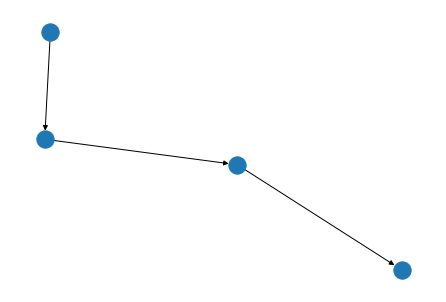

In [34]:
nx.draw(nxT)

<SQL>: WITH node_domain AS (SELECT name FROM nodes1 WHERE name IN (?, ?, ?, ?)) SELECT COUNT(DISTINCT name) FROM nodes1 WHERE name IN node_domain
			↖ ('0', '1', '2', '3')
<SQL>: WITH node_domain AS (SELECT name FROM nodes1 WHERE name IN (?, ?, ?, ?)) SELECT COUNT(DISTINCT name) FROM nodes1 WHERE name IN node_domain
			↖ ('0', '1', '2', '3')
<SQL>: WITH node_domain AS (SELECT name FROM nodes1 WHERE name IN (?, ?, ?, ?)) SELECT COUNT(DISTINCT name) FROM nodes1 WHERE name IN node_domain
			↖ ('0', '1', '2', '3')
<SQL>: WITH node_domain AS (SELECT name FROM nodes1 WHERE name IN (?, ?, ?, ?)) SELECT COUNT(DISTINCT name) FROM nodes1 WHERE name IN node_domain
			↖ ('0', '1', '2', '3')
<SQL>: WITH node_domain AS (SELECT name FROM nodes1 WHERE name IN (?, ?, ?, ?)) SELECT COUNT(DISTINCT name) FROM nodes1 WHERE name IN node_domain
			↖ ('0', '1', '2', '3')
<SQL>: WITH node_domain AS (SELECT name FROM nodes1 WHERE name IN (?, ?, ?, ?)) SELECT DISTINCT name FROM nodes1 WHERE name IN node_domain
	

<SQL>: WITH node_domain AS (SELECT name FROM nodes1 WHERE name IN (?, ?, ?, ?)) SELECT COUNT(?) FROM (SELECT DISTINCT source, target FROM edges1 WHERE target IS NOT NULL AND (source IN node_domain AND target IN node_domain))
			↖ ('0', '1', '2', '3', 1)
<SQL>: WITH node_domain AS (SELECT name FROM nodes1 WHERE name IN (?, ?, ?, ?)) SELECT COUNT(?) FROM (SELECT DISTINCT source, target FROM edges1 WHERE target IS NOT NULL AND (source IN node_domain AND target IN node_domain))
			↖ ('0', '1', '2', '3', 1)
<SQL>: WITH node_domain AS (SELECT name FROM nodes1 WHERE name IN (?, ?, ?, ?)) SELECT DISTINCT source, target FROM edges1 WHERE target IS NOT NULL AND (source IN node_domain AND target IN node_domain)
			↖ ('0', '1', '2', '3')
<SQL>: WITH node_domain AS (SELECT name FROM nodes1 WHERE name IN (?, ?, ?, ?)) SELECT COUNT(DISTINCT name) FROM nodes1 WHERE name IN node_domain
			↖ ('0', '1', '2', '3')
<SQL>: WITH node_domain AS (SELECT name FROM nodes1 WHERE name IN (?, ?, ?, ?)) SELECT COUNT

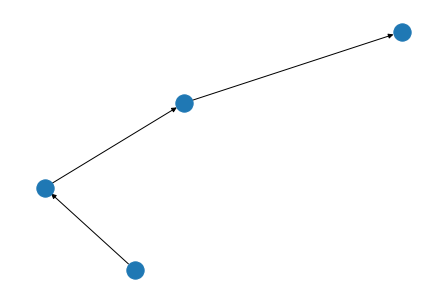

In [93]:
nx.draw(T)

In [94]:
from random import choices, choice

In [95]:
l = list(range(10**5))

In [96]:
deg = list(range(2,20))

In [97]:
adj = [choices(l, k=choice(deg)) for i in l]

In [98]:
adj = {str(i):list(map(str, L)) for i, L in enumerate(adj)}

In [99]:
adj["4"]

['79351',
 '27656',
 '10312',
 '8853',
 '69727',
 '8887',
 '27750',
 '65251',
 '35208',
 '92674',
 '1228',
 '19403',
 '79755']

In [3]:
G = nd.sqlite.DiGraph(db="/tmp/ex3.db", name="A", sql_logger=True)

<SQL>: PRAGMA foreign_keys = ON
<SQL>: SELECT id, name, type, schema, networkdisk_version, creation_date, last_access_date, last_alteration_date, info FROM networkdisk_master WHERE name = ?
			↖ ('"A"',)
<SQL>: SELECT id, name, type, schema, networkdisk_version, creation_date, last_access_date, last_alteration_date, info FROM networkdisk_master WHERE name = ?
			↖ ('"A"',)


In [104]:
G.add_edges_from(list((x, y, {"name":x+y}) for x, L in adj.items() for y in L))

<SQL>: BEGIN TRANSACTION
<SQL>: INSERT INTO edges1(source, target) VALUES (?, ?)
			↖ ('"0"', '"18410"') … ('"99999"', '"68200"')
<SQL>: INSERT INTO nodes1(name) SELECT DISTINCT source FROM edges1 UNION SELECT DISTINCT target FROM edges1
<SQL>: INSERT INTO edge_data1(id, key, value) SELECT id, ?, ? FROM edges1 WHERE source = ? AND target = ?
			↖ ('"name"', '"018410"', '"0"', '"18410"') … ('"name"', '"9999968200"', '"99999 …
<SQL>: COMMIT TRANSACTION


In [105]:
import string

In [106]:
rand_text = lambda: "".join(choices(string.ascii_letters, k=1000))

In [107]:
rand_text()

'sKcBvlXwOagdTrFDUoRtuImupUWoYQigaaBLvtsDxjHZCuZxrZwbszfwKhbizygkXpnaWOTkiRaLeDpWkHBSmcIJiKIjyqtCEjVyGTAmjxbghelUkbMjNZHuNvuKUCgosOdrNkhTjmRwhzBBsTLCtMAsKvKpMCBXHchDcwyfFBnzLyjFzOMQvFplRJAAuXLGSBWYxTHguizMafSZwJPDnkSFyawnPqyXNHzzglhPwEUEpuxSxbIapeYongcsvzIKhYpbeWXdnhafgBxMLiUhGAeMtMprpOhiVZqwOMZraYjQuprdrFGcICJBWFEeFSDauymFQTcLAeSjfTeIxXLwKPUGkeHuyOBQiJfkPoyGJwsmkWSnkzRRjpvEUZVcWXweRywCZrZsXbUwTTPCHhBmsUZYNcAJRqAkTesCyWIvGJQfQgqgVarpknvFvqvqldxjFYBpmdurbRTdtPReukjvjfuOjFXZBFKzoSmYceWwogIomMMIJXlTfvPEkyvlYecfGhIPfFfUFjMHzcKIfOTfZtEzDvoTvnRYMLDHUNHukyrGUdIEaHomOtyuAPcceORlqgnWbRAZUDoqSAwGSvyoltiEeHEcARtTlWxsfnivKCqWSoggVPAKNdlxRHsSuNXVHunhNTjxGxFiwllTcPcFBZwCOlXKyhGoDWQctoKCPmzaFaxzgiSeYKSUotlXmzrSsGbqWzPqcHdYemEMinaocOcIyohTmZYPAOjcEhbfXBcUxRiPtBxtimOCvqixXKKPkNHWvohnZAXqadAcQQxljmnOGPxgTAsWgZSxYLkBSZYnbpskGjnyplqWnhJdAogFksLVvkOoPFSaRurecXsIbipPUKGLcGkrhYwMdVWUdwWHFgJyCwKfIxifhefANzdfSszbBtvcrCLSfKTnkZuoCLcHAdiRlSSESXFlEyyfjJMDpdzXfzvohaMjaEiJdAjYpSTUrmIBseETkcuwhxobduwkGSERlhFnTNlqiiC

In [108]:
G.add_nodes_from([(x, {"content":rand_text()}) for x in G])

<SQL>: SELECT DISTINCT name FROM nodes1
<SQL>: BEGIN TRANSACTION
<SQL>: INSERT INTO nodes1(name) VALUES (?)
			↖ ('"0"',) … ('"99999"',)
<SQL>: INSERT INTO node_data1(name, key, value) SELECT name, ?, ? FROM nodes1 WHERE name = ?
			↖ ('"content"', '"piQpMgSDoaeDzYOJUodKgRpfvHRuUkUUltoacUXwusHHvTBKNwuDdelavCmhB …
<SQL>: COMMIT TRANSACTION


In [112]:
%time G.nodes["1000"]

CPU times: user 72 µs, sys: 11 µs, total: 83 µs
Wall time: 88.7 µs
<SQL>: SELECT DISTINCT key FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE key IS NOT NULL AND (nodes1.name = ?) LIMIT 4
			↖ ('"1000"',)
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"1000"', '"content"')


{content: 'bUNJKJJzgwQCapJKFLNSRdpquOOCKhqnMUkkqNgQxgJkZjDpohfvxqkUUDKHcHjxggqpRTnqEfnYlBdLGopegcDelafXdgDfsVNrsDhlPkvvCRxyjYtSxDJHecjaumnjpqSQwQpycMkJdYZiREbiAdyRbLslcCcTGvZmSvCOIqjqNAPoWmNdIpwZZfjEFwNaUtZtsIILNIsGpEnCZgkbzisXBAjQmdlFxgblEWhePxVeAnmVUPlHMZcTYSGNvHXoRaOjVgMtrPGugvstuxfYjrXZnkRmLSHfMxDuEIPVAEUTNjccRlKmjbSzNWFccIjqVeRObmtkdmsVzpJqARdDuNlQkvjhZNvZMYazaMvnUstnAMUEXGAuofOAvtiqeJgmVIPZzNCCunwtyfMXpXgwYqqBKIWrWQDmwHRWcPrMYmTCbUqtjRzaaKpSgPkFMvkBBiMIWQpkXRpQpGWbZklEgSHCsciSBUSpuScJEapOEBDimSeiZESHQpAUaJWcoNViIPTYXbBmVRBcHKWBCFwhlcthRWJxgkQbhQWvSGUGaCEUpweJDIKsueIweoDQQCslSJQjTJswEVHALoDkmoZXsutZQwwpzsTtKFnAIzlWLrAVDuWbJHUIudMJYaotOcZPAoEBtaUMXAxZDgaFkzHwKBGgQqBQXsBJFKhEgitDClheSyBgaGhdkvtfOXuDmXxIWQHpoHfMANnVwObmWQwXZjxXtdJuOhpgpSAgbtigopoaPQTbZWqFfSAEPpoOsKijjMrTETAbsMdhWqXOVVSdsWrIgRgcxEjdXPDGnOXcOdvvEIjqxjHoABUeZbjKIvQXEOpmnjWiffpEJPgyrEQSTMOZOllPTAsrFYOdMyPwwqnQzrjAgQDFMNQHGikJqbSEUYHiWTenwFWDNVLAyVyCdVjrPGedKLeniVvzeAOhExEgcBMvtvVrsUqhprJfcxIAlMDHlXqQXPzbkUoFcXtMrjicreMfy

In [119]:
a = np.array([0.2, 0.4, 0.6])

In [123]:
np.frombuffer(a.tobytes())

array([0.2, 0.4, 0.6])

In [125]:
rand_vect = lambda : np.array([np.random.rand() for _ in range(255)])

In [139]:
encode = lambda e: base64.encodebytes(e.tobytes()).decode()
encode(rand_vect())

'zdch7GkQ7D+JBnzQ44HuPx3h4gEh3uo/BIWWj4tP5z/jD8cHMovqPzy5pM6r+Nw/vZippNRy6D/9\nMOwUvk7hPwahCixcH+A/yAnqK4gX0j9UOzHdGLDtP5rQjesgYO4/eEcbqWMuyD9dBth93QfuPyWv\n6zs+XO0/sH0aHJub0j9AQeAfj6yDPwu8WHCtBew/oNJxOAKgwj/JBzjzMuvkP0d9ItuTku8/gPVT\nAPJRij9+h94SOs3UP6lfFCdTueA/AKl1rOB90z8CaZHJHHjcP6PEsBXKYOQ/2YXeZvS25j8gX7cL\n7FWxP/oN5cd9Rdc/4spvnMrx6j/lKj1eZ2fkP6RMtAshcOE/xlvzD66Q0j8GUFpacmvSP7XokzLE\n5+w/OKDbbGgr2z8AJ73X0AikPyd6IoQun+M/ivQkGS313j8mXqErfKrTPxOlzVEwKO0/0nyEprLW\n4T/OJQh5+3DqP4AQteUV78k/poHVQA453z+0k030+OvuP4zqROM1WNQ/DMHjwwE81D/c+Mk39IzX\nP5yLtmYabcs/8LW3KkVkoz8B1V+kvF3oPwqg7rMtd+Q/6P7eIK/K2j/qkNaMbZnVPyDaUUg5eaE/\nVKx52V+Wxz9dNm1+lRfoP5g1b/MiKcY/pIlkN54T1D+8Bna62YfjP/uD19AoNeM/Agzcyb3h2j9g\n+YE2h6vvP1LKLQWnquo/Es2dEEcd7z+40JOM+oveP/zFUDxBgcM/ayGs3gsY6T8kz0ZSZcPpP4BD\nLqJAOt8/mnCyyENC6T+Qetn8K5TlP/iAEUbUMd4/PCBC6Cx60T9A53YWRbegP0sIeVE6Xu0/4Osn\nWd6+tj+Xe7F0oWTuP+BKb8CjHbk/lu8Pa85E2T/FUKPNtT7vPwAxamKa1NA/lKh8zfuKyT/Abgj/\nTubJPwygy9K1euU/IaVttM1v7z8uNYb7hQjTPxqsRHztN98/tSRZLcGf7z8M4R3

In [174]:
G.add_nodes_from([(x, {"vector": encode(rand_vect())}) for x in G])

<SQL>: SELECT DISTINCT name FROM nodes1
<SQL>: BEGIN TRANSACTION
<SQL>: INSERT INTO nodes1(name) VALUES (?)
			↖ ('"0"',) … ('"99999"',)
<SQL>: INSERT INTO node_data1(name, key, value) SELECT name, ?, ? FROM nodes1 WHERE name = ?
			↖ ('"vector"', '"3dltw5QX6D9gR2yytHCyP3gQwK5ZIsg/YAAjuI1ZkD97ZJJMQWbrP5YwsPtUBd …
<SQL>: COMMIT TRANSACTION


In [10]:
decode = lambda e: np.frombuffer(base64.decodebytes(e.encode()))

In [158]:
v = rand_vect()

In [155]:
v

array([0.67977305, 0.50224263, 0.71035183, 0.15967726, 0.91015943,
       0.00177892, 0.79680218, 0.764039  , 0.97564634, 0.8995312 ,
       0.32491461, 0.62526683, 0.34527332, 0.53478219, 0.23223047,
       0.02964935, 0.82696603, 0.81580204, 0.20525437, 0.70090806,
       0.38262393, 0.32286149, 0.92416958, 0.47491513, 0.81679168,
       0.45511011, 0.85498061, 0.04462377, 0.55278345, 0.89141438,
       0.38406024, 0.25548276, 0.48003757, 0.13990285, 0.66425852,
       0.50554202, 0.13623871, 0.66168658, 0.29977655, 0.5551758 ,
       0.98728746, 0.2553601 , 0.27803332, 0.92523825, 0.2314842 ,
       0.36098478, 0.68083295, 0.28917215, 0.70237668, 0.76611051,
       0.41381266, 0.73616928, 0.61183978, 0.29518891, 0.22472773,
       0.70349565, 0.63253623, 0.62372537, 0.53589958, 0.20412676,
       0.32031643, 0.13220978, 0.80221417, 0.07465002, 0.09394678,
       0.58200695, 0.18956676, 0.31919499, 0.12792566, 0.31941378,
       0.79786574, 0.07982442, 0.08472404, 0.54528288, 0.43019

In [159]:
decode(encode(v))

array([0.75084365, 0.35759606, 0.71721555, 0.3593025 , 0.92857351,
       0.8130537 , 0.82385587, 0.1212353 , 0.49299538, 0.77678962,
       0.13987176, 0.50120575, 0.10270372, 0.80520325, 0.9533599 ,
       0.0599143 , 0.6655497 , 0.8240623 , 0.41660836, 0.01996887,
       0.40574507, 0.10955238, 0.14137664, 0.48254616, 0.12370005,
       0.9135654 , 0.91564009, 0.71020459, 0.17723518, 0.70031834,
       0.40339082, 0.95984722, 0.69329937, 0.52789397, 0.11668206,
       0.30383697, 0.24318811, 0.19173162, 0.88013612, 0.49653278,
       0.33959752, 0.32269319, 0.1608486 , 0.73531678, 0.79555695,
       0.84714286, 0.4834565 , 0.51409077, 0.2976778 , 0.07855146,
       0.62673371, 0.11115461, 0.13900469, 0.3421865 , 0.86024785,
       0.72405895, 0.83997185, 0.81783317, 0.38910156, 0.35794062,
       0.7338098 , 0.69907436, 0.77519552, 0.66042395, 0.59257143,
       0.22154068, 0.92550612, 0.43761154, 0.75324885, 0.44298061,
       0.59807592, 0.37364514, 0.1648239 , 0.68545587, 0.62077

In [168]:
G.nodes["10000"]["content"]

<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10000"', '"content"')


'jnwDCwHjvoUnvWIqVffcHTnvyBrjzBdFLwGWpgHZOVzEptgsBjqufqVrnesBUnKKGSibArVZMhlOsQGwWIafXoDeNlWUtQXRugvrBUvmsZREZwUwycHEDjIOydXmNXDlEwIQLSTrEFHvIxKCWeYcZezKpxdMpXLsFMezHatXrVAMuajrkqiMAlkmfGpzgOtXtRlrdibCwbKZahFfIQtvovKNsSHzIoqtQeEVBSiTgBHnOiVvOXYPHskjPEfIIahMikjfPtHeXgNYeuBFVEwebFfayZGLlnQfuNcvBgWhyIxpyrBmksdODlzWeXQyoIdfvTFvIoRjXRFtOEWxQTRuVMyrNMVXnqvyklbpeehfklvYnZDNZBcnUhBlxlqrWpRpDMtfiQVGsEGXWJUbjjXwhPtPDwhLsEwOgQrBZPEOQCbfcZTUVrXxlzqcMqyidHPbyNziRoFeUuhJZeFofnZyYgBagfqXizXwOdyeqIwwrJAFNgZolvMLGdHLtQkIjvsZSoYiAJoGkimoRfIhZMFBnjzlSWuztFBDjtBNBhPbjdfWhbFAuvmkJkKzMEwfhYPWLNBzTQvdyQGBiGrGnmfSCwKQfgoeOQgdDsvyyxFmeGoIjmPheltkWVXDLRdONQYpiejFYJlyWZazMPxZmxYaaNfzmgpdIAfzSNNGFUzgBWldGKcydkHNtMvzrsQAjIzWGWuxZjRPytdLAiOTRASwPtTzCMNaXyqGMDGXsJOwpavtcIeoCEbnZWTjZcBoDbbGEOtrVUqhSDYwmEwjbtUsmmSdqpmujVRALfUnftAyftfHHffjebFgmtJSvuOsnDDJrXFymGIYVXsnHqZKmMgaWaNgEftclKwCPgYNegIqfAIfSirmUQGZjpTaLZfwIRfTASDuXFexqSXqerWayVYiITcyQWdoApoEJVeWEBZNZzJubRPKZKZKjwZaxSCReguwzNLOtklkCRvjpPQpQJkKJPVNcCaafIlXXOYvSjj

In [166]:
decode(encode(v))

array([0.75084365, 0.35759606, 0.71721555, 0.3593025 , 0.92857351,
       0.8130537 , 0.82385587, 0.1212353 , 0.49299538, 0.77678962,
       0.13987176, 0.50120575, 0.10270372, 0.80520325, 0.9533599 ,
       0.0599143 , 0.6655497 , 0.8240623 , 0.41660836, 0.01996887,
       0.40574507, 0.10955238, 0.14137664, 0.48254616, 0.12370005,
       0.9135654 , 0.91564009, 0.71020459, 0.17723518, 0.70031834,
       0.40339082, 0.95984722, 0.69329937, 0.52789397, 0.11668206,
       0.30383697, 0.24318811, 0.19173162, 0.88013612, 0.49653278,
       0.33959752, 0.32269319, 0.1608486 , 0.73531678, 0.79555695,
       0.84714286, 0.4834565 , 0.51409077, 0.2976778 , 0.07855146,
       0.62673371, 0.11115461, 0.13900469, 0.3421865 , 0.86024785,
       0.72405895, 0.83997185, 0.81783317, 0.38910156, 0.35794062,
       0.7338098 , 0.69907436, 0.77519552, 0.66042395, 0.59257143,
       0.22154068, 0.92550612, 0.43761154, 0.75324885, 0.44298061,
       0.59807592, 0.37364514, 0.1648239 , 0.68545587, 0.62077

In [169]:
G.nodes["100"]["v"] = encode(v)

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"100"', 'null')
<SQL>: BEGIN TRANSACTION
<SQL>: DELETE FROM node_data1 WHERE (key = ?) AND name IN (SELECT name FROM nodes1 WHERE name = ?)
			↖ ('"v"', '"100"') … ('"v"', '"100"')m
<SQL>: COMMIT TRANSACTION
<SQL>: BEGIN TRANSACTION
<SQL>: INSERT INTO nodes1(name) VALUES (?)
			↖ ('"100"',)
<SQL>: INSERT INTO node_data1(name, key, value) SELECT name, ?, ? FROM nodes1 WHERE name = ?
			↖ ('"v"', '"FefkROkG6D8sSZqX2uLWP5fo+gZu8+Y/RNYh6M/+1j/EgufM37btPxdiLC+JBOo/Uv2 …
<SQL>: COMMIT TRANSACTION


In [173]:
decode(G.nodes["100"]["v"])

<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"100"', '"v"')


array([0.75084365, 0.35759606, 0.71721555, 0.3593025 , 0.92857351,
       0.8130537 , 0.82385587, 0.1212353 , 0.49299538, 0.77678962,
       0.13987176, 0.50120575, 0.10270372, 0.80520325, 0.9533599 ,
       0.0599143 , 0.6655497 , 0.8240623 , 0.41660836, 0.01996887,
       0.40574507, 0.10955238, 0.14137664, 0.48254616, 0.12370005,
       0.9135654 , 0.91564009, 0.71020459, 0.17723518, 0.70031834,
       0.40339082, 0.95984722, 0.69329937, 0.52789397, 0.11668206,
       0.30383697, 0.24318811, 0.19173162, 0.88013612, 0.49653278,
       0.33959752, 0.32269319, 0.1608486 , 0.73531678, 0.79555695,
       0.84714286, 0.4834565 , 0.51409077, 0.2976778 , 0.07855146,
       0.62673371, 0.11115461, 0.13900469, 0.3421865 , 0.86024785,
       0.72405895, 0.83997185, 0.81783317, 0.38910156, 0.35794062,
       0.7338098 , 0.69907436, 0.77519552, 0.66042395, 0.59257143,
       0.22154068, 0.92550612, 0.43761154, 0.75324885, 0.44298061,
       0.59807592, 0.37364514, 0.1648239 , 0.68545587, 0.62077

In [171]:
encv

'FefkROkG6D8sSZqX2uLWP5fo+gZu8+Y/RNYh6M/+1j/EgufM37btPxdiLC+JBOo/Uv28/AZd6j9w\nf8bMRgm/P2qLy4I8jd8/yp0r53Xb6D+8raFhUefBP9lPj6TgCeA/KOARhspKuj+l5LeYOcTpP7zh\nbaHsge4/8APrXBatrj/qO/TiLkzlP3vGFui3Xuo/7O0yGbap2j+gogNIuHKUPza4yi+699k/qHL0\n+58LvD9Mh7g1oRjCP+5i9UQJ4t4/KFUygM6qvz/DGXSC7TvtPwZEeHLsTO0/A7Se/P655j+YwQNy\npK/GP6aWDQMCaeY/4IpJvSfR2T+X1SOCEbfuPzN2WSuCL+Y/Ny6w5YHk4D+griUj4N69P0hKTKEQ\nctM/HM1Uuckgzz8sTTRfqYrIP0KX/zoTKuw/dnR7aTHH3z/giTc+97vVPwQs11oBp9Q/eFu04a+W\nxD8IsEwQt4fnPyizx9czdek/WCdzWMsb6z9uJCSE8/DeP+2k5Hluc+A/AlINNCcN0z+Q4OzK8hu0\nP9AFK9gzDuQ/YP5g6KB0vD9MuEXc58rBP1hprTJi5tU/ym6FgSaH6z+sPDerfSvnP2sZZ6QM4eo/\nW4QperAr6j8IhD89CufYP/q3ccN/6NY/C2e2sl575z88z44z0V7mP7+aetRmzug/8wz4ZzEi5T81\nAopcWPbiP+Sn7utxW8w/EJpSBL+d7T9WbB3S0wHcP7QYolOdGug/PGvWWstZ3D9NfgkacCPjPyQ5\nylLN6dc/PB5MGPMYxT8dfb0oQe/lP+JkkVFq3eM/rKBQ++Ze3z+8rzzi24TLP8BKZFbQH5M/oEWg\n+Wl8lT+EHRfefQHMPwh3p1huu+E/wXohiqr27z8Ijj8YehPaP5Roskt7cMY/RNjVrWOPxD+K76+S\ndHTUP/jov+UKGcY/AIiEaN9S3z8waq//8EzpP0SIjre7eOg/gDjbzR/8iT9MBhn

In [172]:
encode(v) == encv

True

In [4]:
G.nodes["100"]["content"]

<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"100"', '"content"')


'dvfFeofvVVFbGKzzToIGdDkWtMuDhPynVCpmBNeXgSouLGVtXIrHnioRPzlYwZWXhvoNtLnWfCHSiQPAfhabCnPiVSFxoFQFwNnpFPsfXcjePLBfaPeOTPeMeiPTrZheNkqCZykRXYIVNNMKJFifOEKBUNUyAgBMxWSWGUWQVurcvXugdDvgNMCVnFylrzhCTJHJzrSItOSyvsHDNaiesdsvhZknCAjGkmvLFZETmbRIQeBwMqQduityMapVxuQyUYtdVvhQlmoClLKEHzwcnsEtMApyZSMfEVUMdBtOPfnEMEEPZuhcoqUVedUnBARclhfHxnFazpFSldldeRYnaZLpdUNbvARbiYOmNkLxMrKfxwHsvrnZTxaMZIVxyxoCfmNUWGhxnBGaewPvndMgyRmtkbEiroguyyDXLtfxMTHQFiyBeWNBLvaSQsuhXaWFVVyejeqtMTojdUdglHVJPdVDzveXwfXrbYDKkzmRphqcVehbSQkKrmNLmsrJbfcVHXdmMVRyzWJqeXPllqrVhntGizgyMkBFDdAZHpbkoYHwXGbaUXxgStqEIWpPZeQGvGwYsGvHWVqvnauqBEefFWYSWecZhYeGxmfjtGUFGoKcvXPsephpIsTnyHcAHGxJIwoHeBZNnxDXImEEAHumCJGDIOjnygMLcEvHlmnSYVOqTWUagOYhmjIBJKGCrSxwozyXjVLtJwogiEMmkjSEbAXFRaWGIgDvuGXwylrekMZGmfisREXilaSLtkNagwLNVqHqzxBysdgNXfSCOitVajoTgjcXoOPXdbKpfpdfaTVdmsXBsmTFvBRYEWhAGamnLbyyWbcsXQnsHncIYeSGFqCPErfMUfshwHEyjOeOuoDQnrVIXIFtzvUPvCZEyACxQxpaiSVRXukQWaEeKyzcFruNFqKeCCTbimwifluLCZcOKPfNNfJPACmTYzGMRITxjxecjZxuWKlRcKJNovPznVEtcDTyXIVfCBHyHcK

In [178]:
G.nodes["3400"]["content"]

<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"3400"', '"content"')


'OXcxrGyRrJsFbOCTnYbpjyYDXtlQQLppItvVSkDhOVuDGgMwehkonmbbqYGbmDPMEFBPFTmUphmjUSBYPGlGDelQClxUDRQOCtoiGAqePdSpxoofaHCEGoptZNoCgPbAPnaTRAmYGTruEHBXaGAWPvHmvuCPNwRjIrxnCUFCzrFpUHYujjVAHhptPsrBXGgmOANYUKeJbdFdRWdmolrpzTbZchSansSxQbEHKfMITmKjxcTSDodnAdHJvexLLiQOpWxVTNZIzBAyKczGKsdGPHrfcfBbDuaOqFzeeCaYmGVaNuYfyLtHQDeCfszgxWmMDMQJNOqAKmQlflOGCQCwIbvxceIqRLdXBghwaddOtwHvYtPvesSosldBYXoGXnqsrNMOrUCUdVsuJSbsFMkPGLEqxDlcqAEUgJBAvAeNDInrOSIgnezZsJUIAiVadpsMvVXiYWELNlyGHfkETZkizCDuvLtPPVmGNVhggyqrDltnFXKbcWWvAfkJkWnlMstVNxICgDmGEvYmnYhuJSqOXEzwAPWYCZohRucziLUhvDKlNmjKYCDHtivDeXUViuonWVvCOfmDVcsVzMBGHLSSQPeWyutfJwajoiqGSadnAQGvdrllWNXtXKYEfMpMdJMBTXtvoZyZEAPMgjEKCjiKtuepRvbhxoXJVNjfseFpRXlPennIvsjWmsnLfrpuVNuJSogxKCbzskHzWHDwMCyelNyOTEyDFPLhXgpnowNiZodiMEzOINLQwOnEBjbbhlWQRpWJbzOCQsvDSAdLKDDvkYwSeIguNOjxFZBCONKYsbhUfODziNRIrZKiQuhFbzKVReVUweLRgZqKlXxeKKRcXLiBsnFOyCtEAFmapQHEaqeNYfESpinmVXMTonGuBPitzWPYpdjzcLGVdShUtyiXKqqXOPgczTGdbMkltCNpBVXXTxlzKmXbiCAhnPyBWBsturgyhreOEoilWmYElaajBsADbfLGnFLKwspZXPm

In [187]:
v = rand_vect(); json.loads(json.dumps(encode(v)))

'u6ArOXzq7j+2a/ruWjDYP5raHLZRP+o/ZwvKDOSR7j/GenCogVDiP40QSOjzEew/JkW1efEK7j8Y\nmrc5eTqxPwwjutbyU9s/VCppGv1z7D9HyQshU/HqP9NVoQuE8uE/zLTFcl9a7z/jsh4SQWHjP4DY\nkLHcCsA/VRrJsQ3g5T878Pm4dqjoPyw4RVXtrMs/XB55jtl07T/nk5zs7EzsP2CpT34M1KY/5t+p\ngB0p2D9gJeZp+uXOPx6BqluYi+w/4IdTPC4qtT/tPv7CoEfhP5c2ddZHk+w/jmRVYGEr0T+5MiEE\n9OjnP7mU7+/X7uc/2Pa26rH+yj+zSDYlQXzgPxTcQ+TKcdk/UHb2Jszj6j9fWfAsynjoPwASC34L\nTHA/cAuOYczz6j9Azkji1yaAPwjg2axLbdM/veEEtiRH7j9Am1mqmRyBP/P5tKj2Vu8//C3UNI98\nyj+ooYgcEIXcPxsWAQYLiuU/gL9tKUwrzj8UUWFS4lzvP/hYXLxK074/LEd+IoZa2T99zDyY3y/i\nP+jqoU/kFNg/TeJx5Prx5z9QsRftO7LXP0Tg/AAVHdg/qJGsYEFcxD+Hf0RRm77rP20lSaCcbOk/\ndQHIXkrm5T9SNQzavH7UP7COHeSlxNw/YL9vWmC4oD9wqBiHxXWnP+tyDG6P7e0/eT79FKDf7z8A\n9r+v0x9eP+ik2fE8X7s/qHmhAE/XtD/vtuYmB5foP/6RKWLI2d4/zskOHXLX7j9b3donUIfsP7gH\njE1I1eA/GPwxv4hP7z/VObyBl3XjP/Dqaw63eKs/rOQICagm1j8XfBrQqmflP9GGw/WNz+s/UeTD\n7CZi6z9O6pdpNznbP7ipZV6d6OM/WQmD92tf5D+peuV9cVHvP6jKmV1gLs0/QIqPu7r0hT8kKie3\nyUDrP2z6kWP7ptc/t4043p3R4T8acjfIWCDQP7DzEdbVnu4/JIbHTGo60z9wucQ

In [186]:
_ == encode(v)

True

In [200]:
%time c = decode(G.nodes["10000"]["vector"])

<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10000"', '"vector"')
CPU times: user 2.41 ms, sys: 482 µs, total: 2.9 ms
Wall time: 4.69 ms


In [15]:
d = {e: decode(v) for e, v in G.nodes(data="vector")}

<SQL>: SELECT DISTINCT name FROM nodes1
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"0"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"0"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"1"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"1"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JO

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"1001"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"1001"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10010"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10010"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10011"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10011"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nod

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10023"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10023"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10024"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10024"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10025"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10025"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10037"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10037"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10038"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10038"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10039"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10039"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10050"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10050"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10051"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10051"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10052"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10052"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10064"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10064"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10065"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10065"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10066"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10066"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10078"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10078"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10079"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10079"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"1008"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"1008"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nod

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10091"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10091"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10092"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10092"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10093"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10093"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10104"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10104"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10105"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10105"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10106"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10106"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10118"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10118"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10119"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10119"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"1012"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"1012"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nod

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10131"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10131"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10132"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10132"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10133"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10133"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10145"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10145"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10146"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10146"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10147"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10147"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10159"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10159"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"1016"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"1016"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10160"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10160"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nod

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10172"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10172"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10173"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10173"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10174"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10174"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10186"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10186"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10187"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10187"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10188"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10188"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"102"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"102"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"1020"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"1020"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10200"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10200"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10212"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10212"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10213"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10213"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10214"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10214"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10226"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10226"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10227"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10227"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10228"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10228"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"1024"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"1024"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10240"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10240"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10241"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10241"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nod

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10253"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10253"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10254"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10254"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10255"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10255"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10267"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10267"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10268"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10268"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10269"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10269"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10280"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10280"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10281"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10281"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10282"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10282"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10294"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10294"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10295"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10295"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10296"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10296"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10307"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10307"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10308"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10308"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10309"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10309"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10320"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10320"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10321"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10321"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10322"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10322"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10334"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10334"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10335"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10335"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10336"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10336"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10348"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10348"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10349"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10349"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"1035"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"1035"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nod

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10361"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10361"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10362"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10362"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10363"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10363"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

			↖ ('"10374"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10375"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10375"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10376"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10376"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10377"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10377"', '"vector"')
<SQL>: SELECT COUNT(?) FROM node

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10389"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10389"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"1039"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"1039"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10390"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10390"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nod

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10401"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10401"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10402"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10402"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10403"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10403"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10415"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10415"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10416"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10416"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10417"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10417"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10429"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10429"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"1043"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"1043"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10430"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10430"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nod

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10442"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10442"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10443"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10443"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10444"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10444"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10456"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10456"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10457"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10457"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10458"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10458"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"1047"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"1047"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10470"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10470"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10471"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10471"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nod

			↖ ('"10482"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10483"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10483"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10484"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10484"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10485"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10485"', '"vector"')
<SQL>: SELECT COUNT(?) FROM node

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10497"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10497"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10498"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10498"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10499"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10499"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"1051"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"1051"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10510"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10510"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10511"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10511"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nod

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10523"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10523"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10524"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10524"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10525"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10525"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10537"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10537"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10538"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10538"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"10539"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"10539"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON n

KeyboardInterrupt: 

In [6]:
i = iter(d)

<SQL>: SELECT DISTINCT name FROM nodes1
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"0"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"0"', '"vector"')
<SQL>: SELECT COUNT(?) FROM nodes1 INNER JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ? LIMIT 1
			↖ (1, '"1"', '"vector"')
<SQL>: SELECT value FROM nodes1 LEFT JOIN node_data1 ON nodes1.name = node_data1.name WHERE nodes1.name = ? AND key = ?
			↖ ('"1"', '"vector"')


(('0',
  '3dltw5QX6D9gR2yytHCyP3gQwK5ZIsg/YAAjuI1ZkD97ZJJMQWbrP5YwsPtUBdQ/dk4XPDQh5z81\nlYneQMfrP5IqyKrc49g/dtivHMPh1T+Cr9z1ntPuP+g18THdW80/FHDypoi85T9Wf0qJBb/XPyAZ\ng/PqH8o/DpSy3I041T/srx205qHhPw+2ZZk7YOg//ux32VPS5T8bZh8qnFfhP8aOgDLR9ds/veRt\n7/Ci7j9qnK7Fa9/rPyj007jQkNw/Zy7LjkF67T9A7j12q2LiP2RevgYF58s/uDD9XKVC0T/K+BKc\nxAbRP07SMZel6NQ/qAtjQEHY6z868g/VvEXbPwCEhhh1+1o/8mp3weia0T9/q/YmnRztP22qeur6\nLe8/FISma4792z/DhvMpYK/kP0hC90dNUeE/YLbagNh3qz9qPdkYZEzgP/T/dAszatA/HFa5uEzE\n2T/0cYAx1tvEP64tjvnIu9Y/4Jfw8OSakD+tBsDx8t3uP0jA2m+1q7c/w5K0Ga4L5D8Qf7e2OljQ\nPwjVkufIArM/hptPQhdU0D+udz5XQG/YP4BcsCuamYg/8A2Tppgv0D/3DDTGyVfvP0YgmiwMwec/\n8HUFAmKvqD/uxJgeFdHcPyXE3an7C+o/aMzYvB1+xT9kor+8aiTPPzy2bA/EYuE/xpbhfRcL1D9j\nvmgWb63gP54ZBlqIy+k/QKAll8i74D/AwXk0FLiCP+DA0wUeHb0/bgEigBtl0z8AEa3QNF/lP4TI\ns1tiOOA/XwJTxMwD7j8d/0gNYTHoP2hi36j4wro/YWmASneU4D/0ULMI4dPKP7lhzl0W1+k/NCPq\nMrPQ2T94j2S3aIfXPwe3bbZxuO4/QmI5431B3D9clsEiFLjPP5RSlSphcsM/RqxKt4dx6j+S7bBG\ngDDePyz0RyMD58Y/yn2fY6b/0D/HmdcczebiP6pX04FbFN0/muCmiL